In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("german_credit_data.csv")
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [3]:
df.shape

(1000, 11)

In [4]:
df1 = df.drop(df.columns[0], axis="columns")
df1

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [5]:
df1.shape

(1000, 10)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


# Feature engineering

## Data Exploration

Descriptive Statistics

In [7]:
df1.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


Data Types

In [8]:
df1.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

Missing Values

In [9]:
df1.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [10]:
missing_columns = ["Saving accounts", "Checking account"]

In [11]:
df1["Saving accounts"].fillna('Unkown', inplace=True)
df1["Checking account"].fillna('Unkown', inplace=True)
df1.isna().sum()

C:\Users\diass\AppData\Local\Temp\ipykernel_9676\3899548875.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["Saving accounts"].fillna('Unkown', inplace=True)
C:\Users\diass\AppData\Local\Temp\ipykernel_9676\3899548875.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

Visualisation and Outliers

Text(0, 0.5, 'Age')

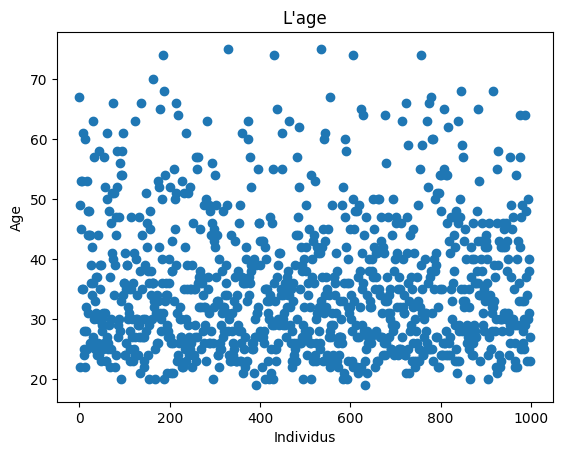

In [12]:
plt.scatter(np.arange(1000), df1.Age)
plt.title("L'age")
plt.xlabel("Individus")
plt.ylabel("Age")

Text(0, 0.5, 'Job')

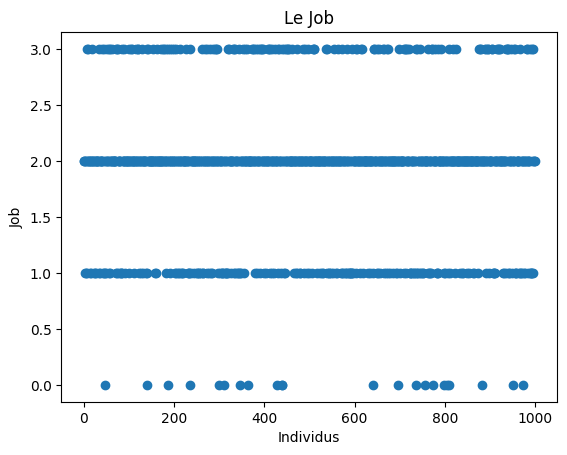

In [13]:
plt.scatter(np.arange(1000), df1.Job)
plt.title("Le Job")
plt.xlabel("Individus")
plt.ylabel("Job")

Text(0, 0.5, 'Credit amount')

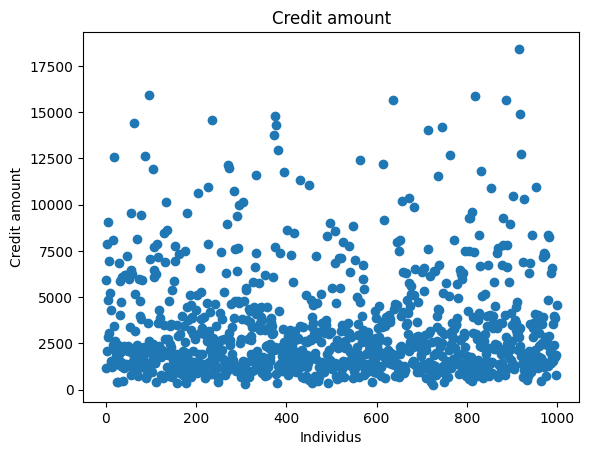

In [14]:
plt.scatter(np.arange(1000), df1["Credit amount"])
plt.title("Credit amount")
plt.xlabel("Individus")
plt.ylabel("Credit amount")

Text(0, 0.5, 'Duration')

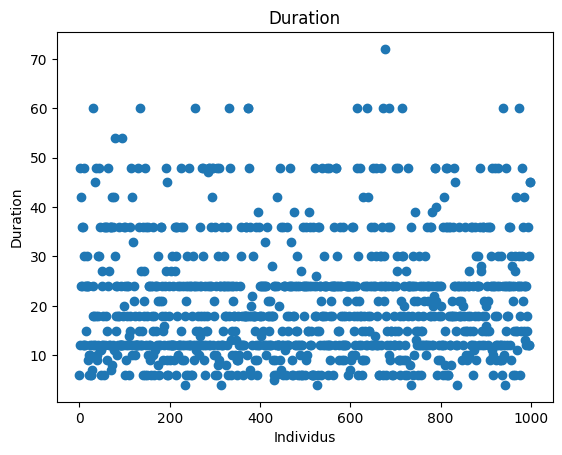

In [15]:
plt.scatter(np.arange(1000), df1["Duration"])
plt.title("Duration")
plt.xlabel("Individus")
plt.ylabel("Duration")

Isolation Forest

In [16]:
from sklearn.ensemble import IsolationForest
# Create an Isolation Forest model
iso_forest = IsolationForest(contamination=0.05) # Adjust contamination based on your dataset
# Fit the model to your data
iso_forest.fit(pd.DataFrame(df1["Credit amount"]))
# Predict outliers
isolation_forest_outliers = iso_forest.predict(pd.DataFrame(df1["Credit amount"]))
isolation_forest_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

Text(0, 0.5, 'Credit amount')

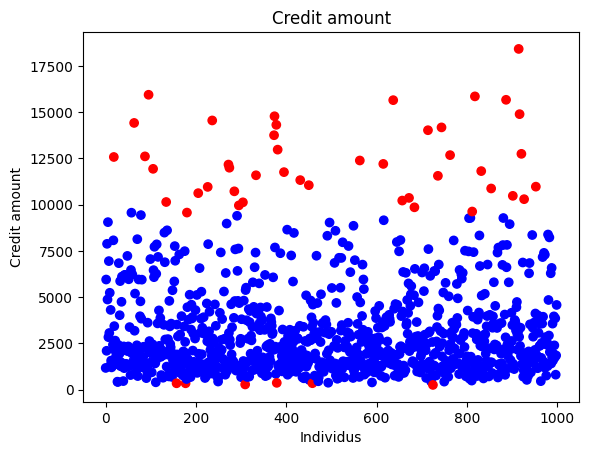

In [17]:
colors = pd.Series(isolation_forest_outliers).map({-1: 'red', 1: 'blue'})
plt.scatter(np.arange(1000), df1["Credit amount"], c=colors)
plt.title("Credit amount")
plt.xlabel("Individus")
plt.ylabel("Credit amount")

IQR

In [18]:
Q1 = np.percentile(df1["Credit amount"], 25)
Q3 = np.percentile(df1["Credit amount"], 75)

IQR = Q3 - Q1

# Calculate outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# iqr_outliers = [x for x in df1["Credit amount"] if x < lower_bound or x > upper_bound]
iqr_outliers = df1["Credit amount"].apply(lambda x: True if x < lower_bound or x > upper_bound else False)
iqr_outliers

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Credit amount, Length: 1000, dtype: bool

Text(0, 0.5, 'Credit amount')

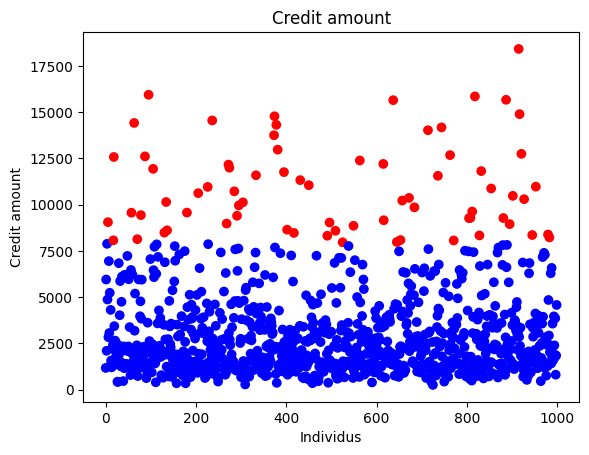

In [19]:
colors = iqr_outliers.map({True: 'red', False: 'blue'})
plt.scatter(np.arange(1000), df1["Credit amount"], c=colors)
plt.title("Credit amount")
plt.xlabel("Individus")
plt.ylabel("Credit amount")

Zscore

In [20]:
from scipy.stats import zscore
threshold = 3

In [21]:
z_scores_age = zscore(df1.Age)
outliers_age = (z_scores_age > threshold) | (z_scores_age < -threshold)
outliers_age

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Age, Length: 1000, dtype: bool

Text(0, 0.5, 'Age')

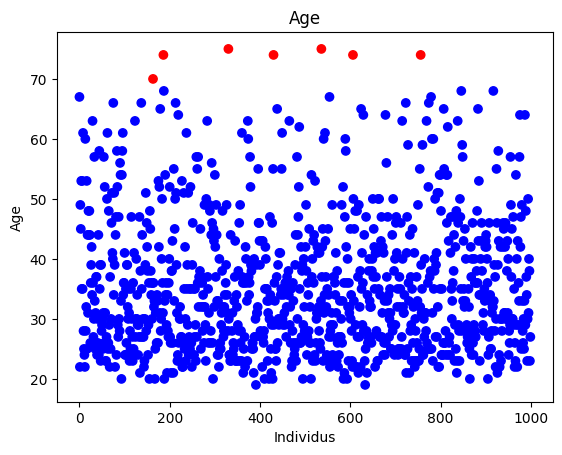

In [22]:
colors = outliers_age.map({True: 'red', False: 'blue'})
plt.scatter(np.arange(1000), df1.Age, c=colors)
plt.title("Age")
plt.xlabel("Individus")
plt.ylabel("Age")

In [23]:
z_scores_job = zscore(df1.Job)
outliers_job = (z_scores_job > threshold) | (z_scores_job < -threshold)
outliers_job

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Job, Length: 1000, dtype: bool

Text(0, 0.5, 'Job')

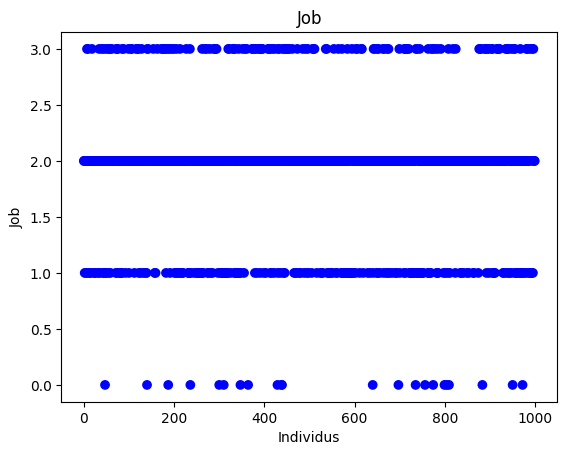

In [24]:
colors = outliers_job.map({True: 'red', False: 'blue'})
plt.scatter(np.arange(1000), df1.Job, c=colors)
plt.title("Job")
plt.xlabel("Individus")
plt.ylabel("Job")

In [25]:
z_scores_credit_amount = zscore(df1["Credit amount"])
outliers_credit_amount = (z_scores_credit_amount > threshold) | (z_scores_credit_amount < -threshold)
outliers_credit_amount

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Credit amount, Length: 1000, dtype: bool

Text(0, 0.5, 'Credit amount')

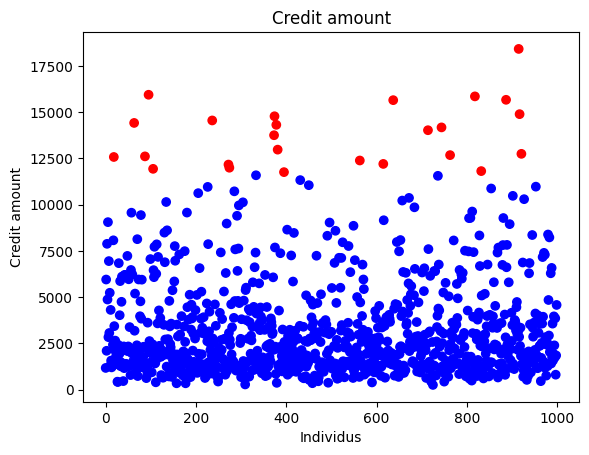

In [26]:
colors = outliers_credit_amount.map({True: 'red', False: 'blue'})
plt.scatter(np.arange(1000), df1["Credit amount"], c=colors)
plt.title("Credit amount")
plt.xlabel("Individus")
plt.ylabel("Credit amount")

In [27]:
z_scores_duration = zscore(df1.Duration)
outliers_duration = (z_scores_duration > threshold) | (z_scores_duration < -threshold)
outliers_duration

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Duration, Length: 1000, dtype: bool

Text(0, 0.5, 'Duration')

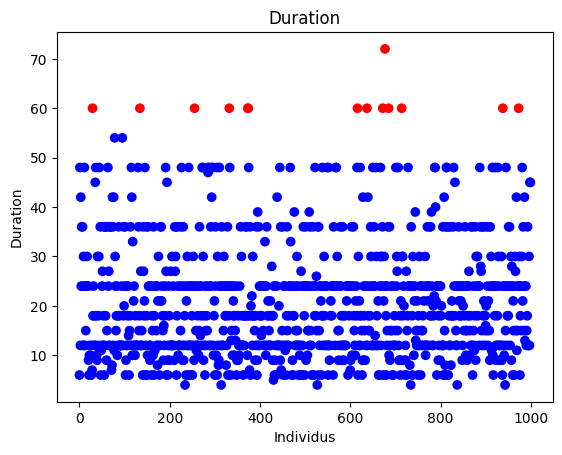

In [28]:
colors = outliers_duration.map({True: 'red', False: 'blue'})
plt.scatter(np.arange(1000), df1.Duration, c=colors)
plt.title("Duration")
plt.xlabel("Individus")
plt.ylabel("Duration")

In [29]:
df1["has_outlier"] = (outliers_age | outliers_job | outliers_credit_amount | outliers_duration)
df1[df1["has_outlier"] == True]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,has_outlier
18,44,female,3,free,little,moderate,12579,24,car,bad,True
29,63,male,2,own,little,little,6836,60,business,bad,True
63,25,male,2,own,little,moderate,14421,48,business,bad,True
87,47,male,2,free,moderate,moderate,12612,36,education,bad,True
95,58,male,2,rent,little,moderate,15945,54,business,bad,True
105,39,male,3,own,little,moderate,11938,24,vacation/others,bad,True
134,21,female,2,own,moderate,Unkown,10144,60,radio/TV,good,True
163,70,male,3,free,little,moderate,7308,10,car,good,True
186,74,female,3,free,little,moderate,5129,9,car,bad,True
236,23,male,0,own,Unkown,moderate,14555,6,car,bad,True


In [30]:
df2 = df1[df1["has_outlier"] == False].drop(["has_outlier"], axis="columns")
df2

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,Unkown,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,Unkown,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,Unkown,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,Unkown,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [31]:
df2.shape

(958, 10)

Distribution

In [32]:
import seaborn as sn

Text(5.069444444444445, 0.5, 'Frequency')

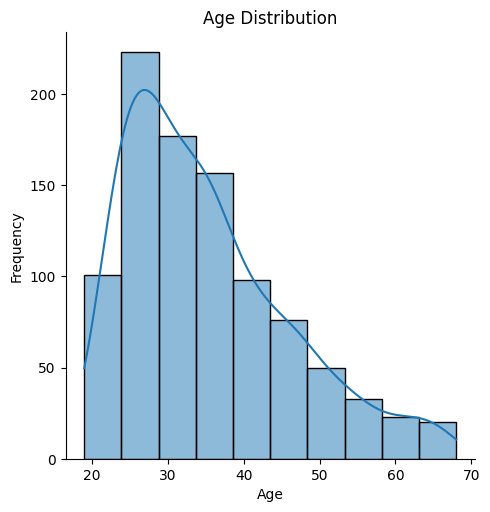

In [33]:
# plt.figure(figsize=(6, 4))
sn.displot(df2["Age"], bins=10, kde=True)  # KDE adds the Kernel Density Estimate curve
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

Text(5.069444444444445, 0.5, 'Count')

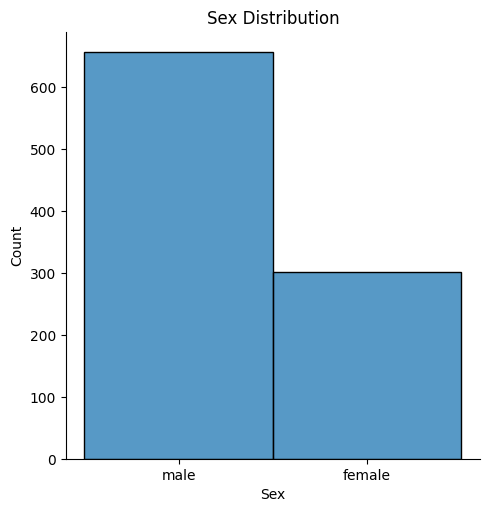

In [34]:
sn.displot(df2["Sex"])
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")

Text(5.069444444444445, 0.5, 'Frequency')

<Figure size 600x400 with 0 Axes>

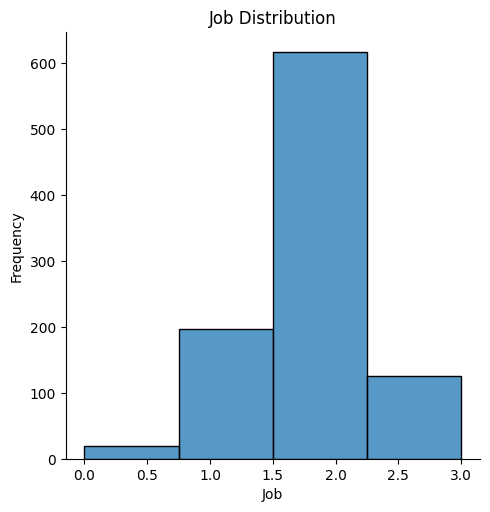

In [35]:
plt.figure(figsize=(6, 4))
sn.displot(df2["Job"], bins=4)  # KDE adds the Kernel Density Estimate curve
plt.title("Job Distribution")
plt.xlabel("Job")
plt.ylabel("Frequency")

Text(5.069444444444445, 0.5, 'Count')

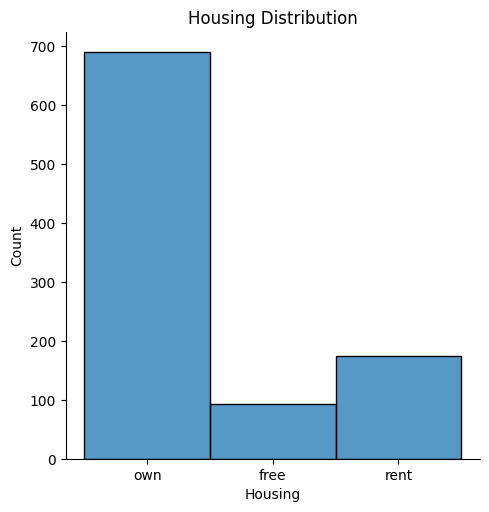

In [36]:
sn.displot(df2["Housing"])
plt.title("Housing Distribution")
plt.xlabel("Housing")
plt.ylabel("Count")

Text(5.069444444444445, 0.5, 'Count')

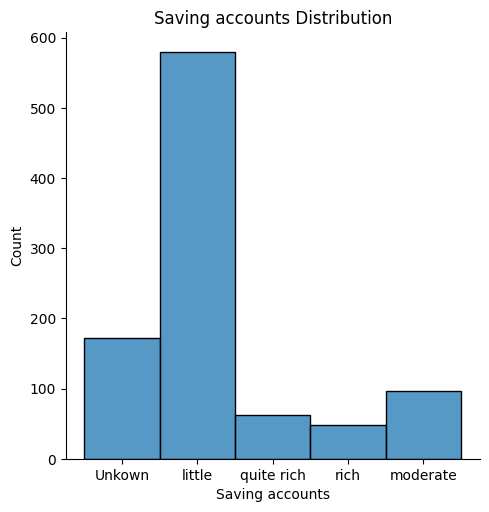

In [37]:
sn.displot(df2["Saving accounts"])
plt.title("Saving accounts Distribution")
plt.xlabel("Saving accounts")
plt.ylabel("Count")

Text(5.069444444444445, 0.5, 'Count')

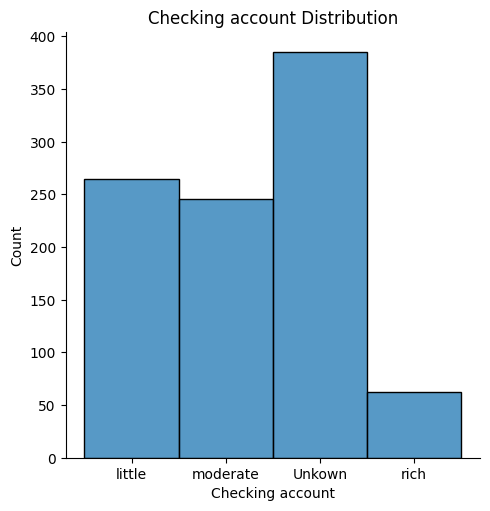

In [38]:
sn.displot(df2["Checking account"])
plt.title("Checking account Distribution")
plt.xlabel("Checking account")
plt.ylabel("Count")

Text(5.069444444444445, 0.5, 'Credit amount')

<Figure size 600x400 with 0 Axes>

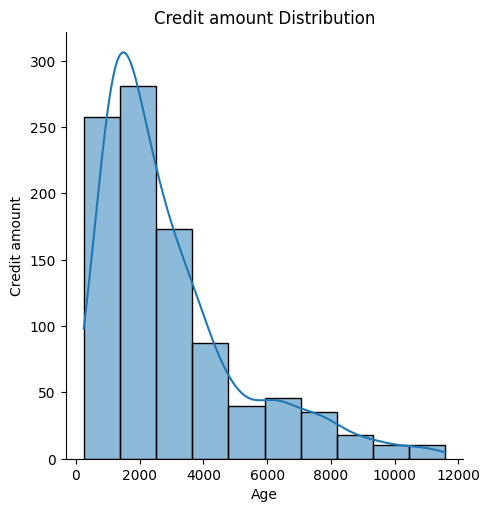

In [39]:
plt.figure(figsize=(6, 4))
sn.displot(df2["Credit amount"], bins=10, kde=True)  # KDE adds the Kernel Density Estimate curve
plt.title("Credit amount Distribution")
plt.xlabel("Age")
plt.ylabel("Credit amount")

Text(5.069444444444445, 0.5, 'Frequency')

<Figure size 600x400 with 0 Axes>

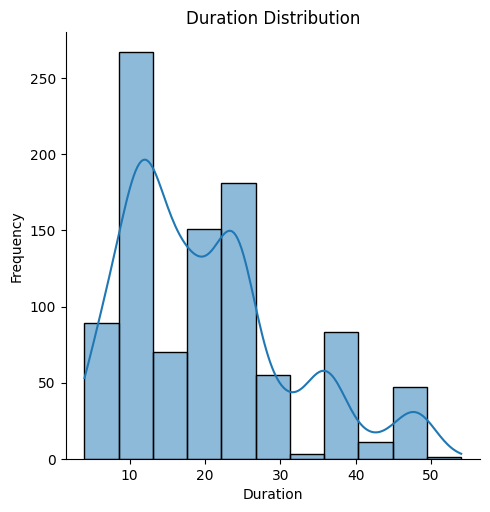

In [40]:
plt.figure(figsize=(6, 4))
sn.displot(df2["Duration"], bins=11, kde=True)  # KDE adds the Kernel Density Estimate curve
plt.title("Duration Distribution")
plt.xlabel("Duration")
plt.ylabel("Frequency")

Text(5.069444444444445, 0.5, 'Count')

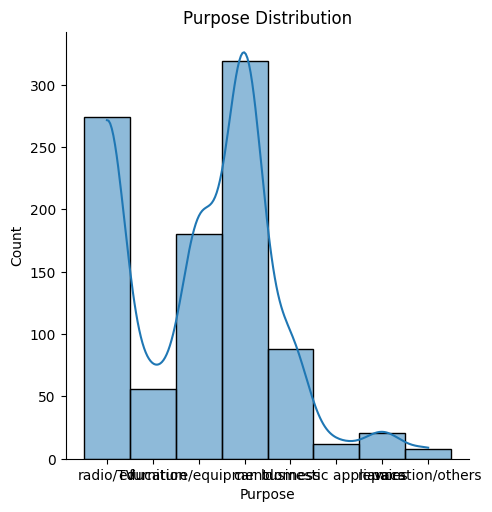

In [41]:
sn.displot(df2["Purpose"], kde=True)
plt.title("Purpose Distribution")
plt.xlabel("Purpose")
plt.ylabel("Count")

Text(5.069444444444445, 0.5, 'Count')

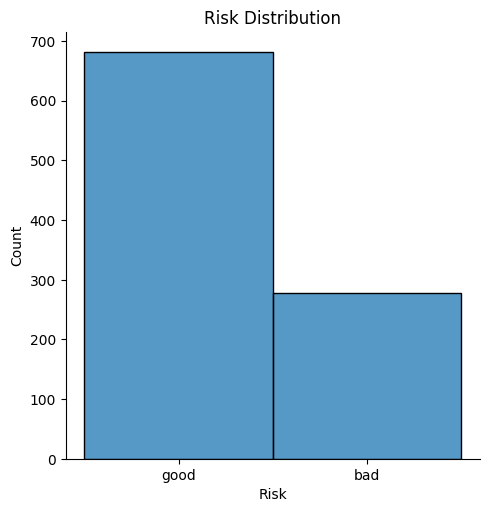

In [42]:
sn.displot(df2["Risk"])
plt.title("Risk Distribution")
plt.xlabel("Risk")
plt.ylabel("Count")

Duplicate

In [43]:
df2.duplicated().sum()

np.int64(0)

Features selection

Correlation Analysis

In [44]:
continuous_variables = ["Age", "Job", "Credit amount", "Duration"]

In [45]:
correlation_matrix = df2[continuous_variables].corr()
correlation_matrix

,Age,Job,Credit amount,Duration
Age,1.000000,-0.020995,-0.008650,-0.032732
Job,-0.020995,1.000000,0.247295,0.179863
Credit amount,-0.008650,0.247295,1.000000,0.615928
Duration,-0.032732,0.179863,0.615928,1.000000


Scaling and Normalization

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
min_scale = MinMaxScaler()

In [48]:
age = pd.DataFrame(min_scale.fit_transform(pd.DataFrame(df2["Age"])), columns=["Age"])
type(age)

pandas.core.frame.DataFrame

In [49]:
job = pd.DataFrame(min_scale.fit_transform(pd.DataFrame(df2["Job"])), columns=["Job"])
job

,Job
0,0.666667
1,0.666667
2,0.333333
3,0.666667
4,0.666667
...,...
953,0.333333
954,1.000000
955,0.666667
956,0.666667


In [50]:
credit_amount = pd.DataFrame(min_scale.fit_transform(pd.DataFrame(df2["Credit amount"])), columns=["Credit amount"])
credit_amount

,Credit amount
0,0.081041
1,0.502734
2,0.162787
3,0.673016
4,0.407407
...,...
953,0.131041
954,0.318078
955,0.048854
956,0.140653


In [51]:
duration = pd.DataFrame(min_scale.fit_transform(pd.DataFrame(df2["Duration"])), columns=["Duration"])
duration

,Duration
0,0.04
1,0.88
2,0.16
3,0.76
4,0.40
...,...
953,0.16
954,0.52
955,0.16
956,0.82


Feature Transformation

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
df2["Sex"].value_counts()

Sex
male      656
female    302
Name: count, dtype: int64

In [54]:
# male: 1, female: 0
le_sex = LabelEncoder()
sex = le_sex.fit_transform(df2["Sex"])
sex = pd.DataFrame(sex, columns=["Sex"])
sex = sex.reset_index(drop=True)
sex

,Sex
0,1
1,0
2,1
3,1
4,1
...,...
953,0
954,1
955,1
956,1


In [55]:
df2["Housing"].value_counts()

Housing
own     690
rent    175
free     93
Name: count, dtype: int64

In [56]:
house = pd.get_dummies(df2["Housing"], dtype=int)
house = house.reset_index(drop=True)
house

,free,own,rent
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
953,0,1,0
954,0,1,0
955,0,1,0
956,1,0,0


In [57]:
df2["Saving accounts"].value_counts()

Saving accounts
little        579
Unkown        172
moderate       97
quite rich     62
rich           48
Name: count, dtype: int64

In [58]:
saving_accounts = pd.get_dummies(df2["Saving accounts"], dtype=int)
saving_accounts = saving_accounts.reset_index(drop=True)
saving_accounts

,Unkown,little,moderate,quite rich,rich
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
953,0,1,0,0,0
954,0,1,0,0,0
955,0,1,0,0,0
956,0,1,0,0,0


In [59]:
df2["Checking account"].value_counts()

Checking account
Unkown      385
little      265
moderate    246
rich         62
Name: count, dtype: int64

In [60]:
checking_account = pd.get_dummies(df2["Checking account"], dtype=int)
checking_account = checking_account.reset_index(drop=True)
checking_account

,Unkown,little,moderate,rich
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
953,1,0,0,0
954,0,1,0,0
955,1,0,0,0
956,0,1,0,0


In [61]:
df2["Purpose"].value_counts()

Purpose
car                    319
radio/TV               274
furniture/equipment    180
business                88
education               56
repairs                 21
domestic appliances     12
vacation/others          8
Name: count, dtype: int64

In [62]:
purpose = pd.get_dummies(df2["Purpose"], dtype=int)
purpose = purpose.reset_index(drop=True)
purpose

,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
953,0,0,0,0,1,0,0,0
954,0,1,0,0,0,0,0,0
955,0,0,0,0,0,1,0,0
956,0,0,0,0,0,1,0,0


In [63]:
df2["Risk"].value_counts()

Risk
good    681
bad     277
Name: count, dtype: int64

In [64]:
# Good: 1, bad:0
le_risk = LabelEncoder()
risk = le_risk.fit_transform(df2["Risk"])
risk

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,

In [65]:
X = pd.concat([age, sex, job, house, saving_accounts, checking_account, credit_amount, duration, purpose], axis="columns")
X

,Age,Sex,Job,free,own,rent,Unkown,little,moderate,quite rich,...,Credit amount,Duration,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,0.979592,1,0.666667,0,1,0,1,0,0,0,...,0.081041,0.04,0,0,0,0,0,1,0,0
1,0.061224,0,0.666667,0,1,0,0,1,0,0,...,0.502734,0.88,0,0,0,0,0,1,0,0
2,0.612245,1,0.333333,0,1,0,0,1,0,0,...,0.162787,0.16,0,0,0,1,0,0,0,0
3,0.530612,1,0.666667,1,0,0,0,1,0,0,...,0.673016,0.76,0,0,0,0,1,0,0,0
4,0.693878,1,0.666667,1,0,0,0,1,0,0,...,0.407407,0.40,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,0.244898,0,0.333333,0,1,0,0,1,0,0,...,0.131041,0.16,0,0,0,0,1,0,0,0
954,0.428571,1,1.000000,0,1,0,0,1,0,0,...,0.318078,0.52,0,1,0,0,0,0,0,0
955,0.387755,1,0.666667,0,1,0,0,1,0,0,...,0.048854,0.16,0,0,0,0,0,1,0,0
956,0.081633,1,0.666667,1,0,0,0,1,0,0,...,0.140653,0.82,0,0,0,0,0,1,0,0


In [66]:
X.isna().sum()

Age                    0
Sex                    0
Job                    0
free                   0
own                    0
rent                   0
Unkown                 0
little                 0
moderate               0
quite rich             0
rich                   0
Unkown                 0
little                 0
moderate               0
rich                   0
Credit amount          0
Duration               0
business               0
car                    0
domestic appliances    0
education              0
furniture/equipment    0
radio/TV               0
repairs                0
vacation/others        0
dtype: int64

In [67]:
Y = pd.DataFrame(risk, columns=["Risk"])
Y

,Risk
0,1
1,0
2,1
3,1
4,0
...,...
953,1
954,1
955,1
956,0


Handle inbalance

In [68]:
from imblearn.over_sampling import RandomOverSampler

In [69]:
samper = RandomOverSampler(sampling_strategy=1)
x_os, y_os = samper.fit_resample(X, Y)

In [70]:
y_os["Risk"].value_counts()

Risk
1    681
0    681
Name: count, dtype: int64

# Data split

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_os, y_os, test_size=0.2)

In [72]:
X_train.shape

(1089, 25)

In [73]:
y_train.shape

(1089, 1)

In [74]:
X_test.shape

(273, 25)

In [75]:
y_test.shape

(273, 1)

# Build model

Grid Search Cross Validation

In [76]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct, Matern

In [77]:
model_params = {
    'svm': {
        'model': SVC(),
        'params' : {
            "C": [1.0, 2.0, 3.0],
            "kernel": ["linear", "poly", "rbf", "sigmoid"],
            "degree": [1, 2, 3],
            "gamma": ["scale", "auto"]
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            "n_estimators": [10, 50, 100, 200],
            "criterion": ["gini", "entropy", "log_loss"],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "bootstrap": [True, False]
        }
    },
    'gradient_boosting' : {
        'model': GradientBoostingClassifier(),
        'params': {
            "n_estimators": [100, 50, 10],
            "learning_rate": [1.0, 0.5, 0.1, 0.01],
            "max_depth": [3, 2, 1],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params' : {
            "criterion": ["gini", "entropy"],
            "splitter": ["best", "random"],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }  
    },
    'naive_bayes': {
        'model': MultinomialNB(),
        'params' : {
            "alpha": [0.1, 1.0, 10],
            "fit_prior": [True, False],
            "class_prior": [None, [0.5, 0.5]]
        }
    },
    'gaussian_nb': {
        'model': GaussianNB(),
        'params': {
            "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]  # Regularization parameter to avoid zero variance
        }
    },
    'knn' : {
        'model': KNeighborsClassifier(),
        'params': {
            "n_neighbors": [5, 10, 50],
            "weights": ["uniform", "distance"],
            "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
            "p": [1, 2],  # p=1 is Manhattan distance, p=2 is Euclidean
            "leaf_size": [30, 40, 50]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
            "penalty": ["l2", "l1"],
            "C": [0.1, 1.0, 10],
            "solver": ["liblinear", "saga"],
            "max_iter": [100, 200]
        }
    },
    'extra_trees': {
        'model': ExtraTreesClassifier(),
        'params': {
            "n_estimators": [10, 50, 100],
            "criterion": ["gini", "entropy"],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    },
    'adaboost': {
        'model': AdaBoostClassifier(),
        'params': {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 1.0]
        }
    },
    'voting_classifier': {
        'model': VotingClassifier(
            estimators=[
                ('svm', SVC(kernel='linear')),
                ('random_forest', RandomForestClassifier(n_estimators=100)),
                ('logistic', LogisticRegression(solver='liblinear'))
            ],
            voting='hard',  # or 'soft' for probability-based voting
            weights=[1, 1, 1]  # Optional: set the weight for each classifier
        ),
        'params': {
            "voting": ["hard", "soft"],
            "weights": [[1, 1, 1], [2, 1, 1], [1, 2, 1]]
        }
    },
    'gaussian_process': {
        'model': GaussianProcessClassifier(),
        'params': {
            "kernel": [RBF(), DotProduct(), Matern()],
            "n_restarts_optimizer": [0, 1, 10],
            "max_iter_predict": [100, 200]
        }
    },
}


In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores)

C:\Users\diass\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\diass\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\diass\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

In [80]:
print(df)

                  model  best_score  \
0                   svm    0.751114   
1         random_forest    0.850315   
2     gradient_boosting    0.839285   
3         decision_tree    0.813592   
4           naive_bayes    0.714387   
5           gaussian_nb    0.656551   
6                   knn    0.794292   
7   logistic_regression    0.712573   
8           extra_trees    0.832867   
9              adaboost    0.737369   
10    voting_classifier    0.796136   
11     gaussian_process    0.734609   

                                          best_params  
0   {'C': 2.0, 'degree': 3, 'gamma': 'scale', 'ker...  
1   {'bootstrap': False, 'criterion': 'log_loss', ...  
2   {'learning_rate': 1.0, 'max_depth': 3, 'min_sa...  
3   {'criterion': 'gini', 'max_depth': None, 'min_...  
4   {'alpha': 0.1, 'class_prior': None, 'fit_prior...  
5                            {'var_smoothing': 1e-06}  
6   {'algorithm': 'auto', 'leaf_size': 30, 'n_neig...  
7   {'C': 1.0, 'max_iter': 100, 'penalty': '

In [81]:
df.iloc[1]["best_params"]

{'bootstrap': False,
 'criterion': 'log_loss',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap=False, criterion="gini", max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

C:\Users\diass\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9010989010989011


In [105]:
y_pred = rf.predict(X_test)

In [106]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       143
           1       0.90      0.89      0.90       130

    accuracy                           0.90       273
   macro avg       0.90      0.90      0.90       273
weighted avg       0.90      0.90      0.90       273



In [104]:
import joblib

joblib.dump(rf, "random_forest_model")

['random_forest_model']

In [86]:
MAX_AGE = df1["Age"].max()
MAX_JOB = df1["Job"].max()
MAX_CREDIT_AMOUNT = df1["Credit amount"].max()
MAX_DURATION = df1["Duration"].max()

In [87]:
def new_data_treatment(age_samp, sex_samp, job_samp, house_samp, saving_accounts_samp, checking_account_samp, credit_amount_samp, duration_samp, purpose_samp):
    age = np.array([age_samp / MAX_AGE])

    sex = np.array([1]) if sex_samp == "male" else np.array([0])

    job = np.array([job_samp / MAX_JOB])

    house = np.zeros(3)
    match house_samp:
        case "free":
            house[0] = 1
        case "own":
            house[1] = 1
        case "rent":
            house[2] = 1

    # Unknown	little	moderate	quite rich	rich
    saving_accounts = np.zeros(5)
    match saving_accounts_samp:
        case "Unknown":
            saving_accounts[0] = 1
        case "little":
            saving_accounts[1] = 1
        case "moderate":
            saving_accounts[2] = 1
        case "quite rich":
            saving_accounts[3] = 1
        case "rich":
            saving_accounts[4] = 1

    checking_account = np.zeros(4)
    match checking_account_samp:
        case "Unknown":
            checking_account[0] = 1
        case "little":
            checking_account[1] = 1
        case "moderate":
            checking_account[2] = 1
        case "rich":
            checking_account[3] = 1

    credit_amount = np.array([credit_amount_samp / MAX_CREDIT_AMOUNT])

    duration = np.array([duration_samp / MAX_DURATION])

    purpose = np.zeros(8)
    match purpose_samp:
        case "business":
            purpose[0] = 1
        case "car":
            purpose[1] = 1
        case "domestic appliances":
            purpose[2] = 1
        case "education":
            purpose[3] = 1
        case "furniture/equipment":
            purpose[4] = 1
        case "radio/TV":
            purpose[5] = 1
        case "repairs":
            purpose[6] = 1
        case "vacation/others":
            purpose[7] = 1

    data = np.concat((age, sex, job, house, saving_accounts, checking_account, credit_amount, duration, purpose))
    return np.array([data])

In [88]:
data = new_data_treatment(32, "male", 0, "rent", "little", "little", 10000, 48, "business")
data

array([[0.42666667, 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.5427703 , 0.66666667, 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [89]:
rf.predict_proba(data)

C:\Users\diass\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.68333333, 0.31666667]])

Naive_baye

In [90]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
print(nb.score(X_test, y_test))

0.6813186813186813


C:\Users\diass\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic regression

In [91]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.6776556776556777


C:\Users\diass\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Decision tree

In [92]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print(dt.score(X_test, y_test))

0.8461538461538461


SVM

In [93]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_test, y_test))

C:\Users\diass\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.717948717948718


K Neighbors

In [94]:
from  sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

C:\Users\diass\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.684981684981685


Gradient Boosting

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
print(gb.score(X_test, y_test))

C:\Users\diass\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7582417582417582
